### Import Package

In [5]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

## Data Collection 

Load the dataset into Python with Pandas

In [6]:
df = pd.read_excel('Dataset.xlsx')

### Data Exploration

In Data Exploration, we will be looking at:
- understanding the data structure, statistics, and quality of the dataset,
- visualizing the data to gain insights,
- checking for missing values.

See the first few rows of the dataset

In [7]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


Checking for missing values

In [8]:
missing_values = df.isnull().sum()

missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

Checking for Duplicates

In [9]:
df.duplicated().any()

np.False_

Get a statistical overview of the numerical columns in the dataset.

In [10]:
starts_overview = df.describe()

starts_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


Next, we see how the target variable `ChurnLabel`, and some of the other variable are distributed.

<function matplotlib.pyplot.show(close=None, block=None)>

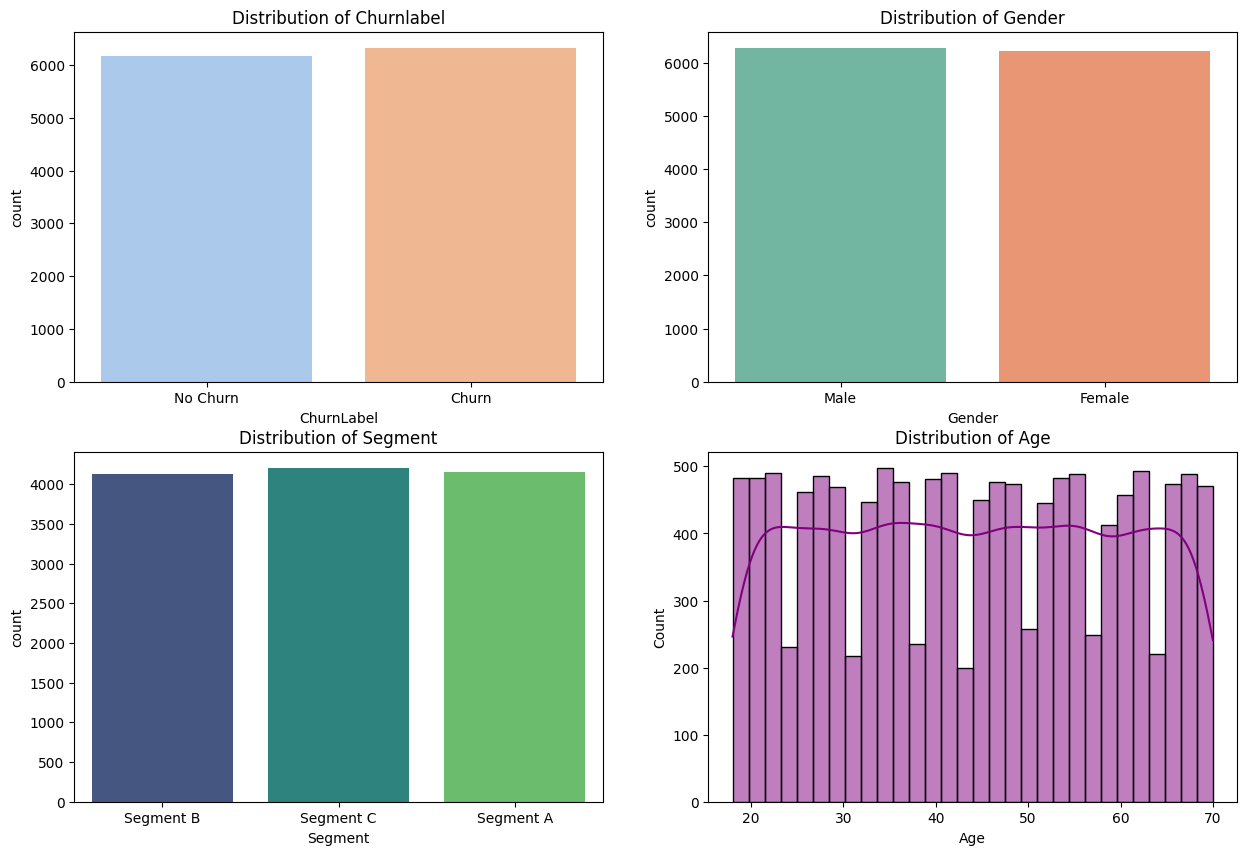

In [11]:
# Setup the figure and the axis
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot the distribution of the target variable `ChurnLabel`
sns.countplot(x='ChurnLabel', data=df, ax=ax[0, 0], palette='pastel')  # Change palette as needed
ax[0, 0].set_title('Distribution of Churnlabel')
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])

# Plot the distribution of the Gender
sns.countplot(x='Gender', data=df, ax=ax[0, 1], palette='Set2')  # Change palette as needed
ax[0, 1].set_title('Distribution of Gender')

# Plot distribution of segment
sns.countplot(x='Segment', data=df, ax=ax[1, 0], palette='viridis')  # Change palette as needed
ax[1, 0].set_title('Distribution of Segment')

# Plot distribution of Age
sns.histplot(df['Age'], bins=30, ax=ax[1, 1], kde=True, color='purple')  # Change color as needed
ax[1, 1].set_title('Distribution of Age')

plt.tight_layout
plt.show

Correlation Analysis: Which columns in the dataset correlate with the `ChurnLabel` column.

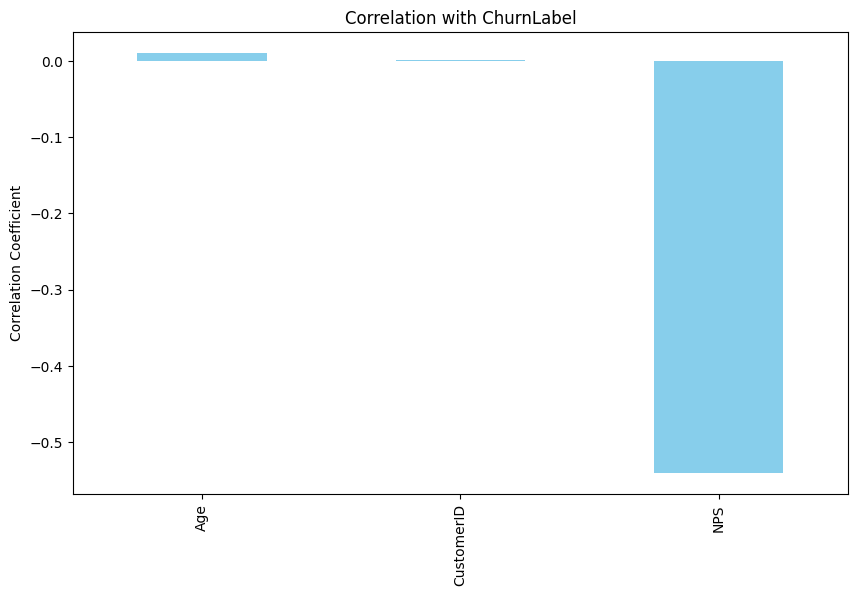

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [12]:
# Calculate correlation with churnlabel
correlation = df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(10, 6))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.show()

correlation

We're going to be exploring the nested columns next, and see how they are nested.

In [13]:
# List out all the nested columns
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

# Print out the first value in each of the columns
w1, w2 = 25, 1000
for col in nested_columns:
    row = [col, df[col][0]]
    print('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))


| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Temporal Analysis: Here, we take a look at how the churn rate changes over time to see if there are any recurring pattern

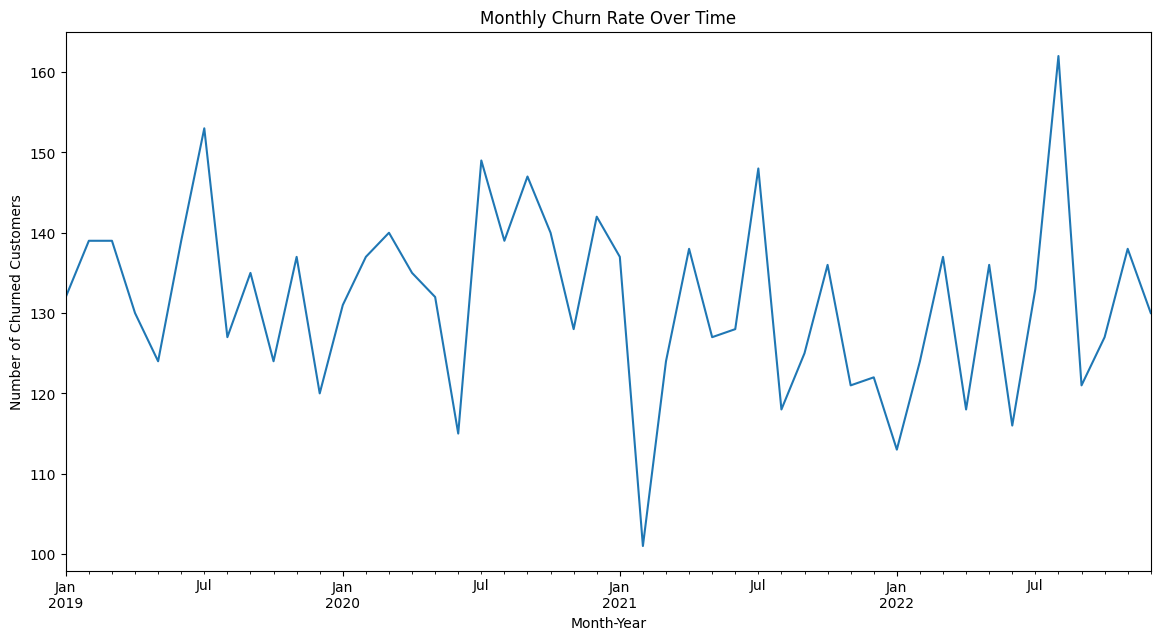

In [14]:
# Convert the Timestamp to datetime format so that it can be grouped
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the month-year from the timestamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

# Group by MonthYear and calculate the churn rates
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()

# Plot the churn rate over time
plt.figure(figsize=(14, 7))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate Over Time')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Month-Year')
plt.show()

We also need to see if there are any patterns between the customer feedback `Rating` and `ChurnLabel`

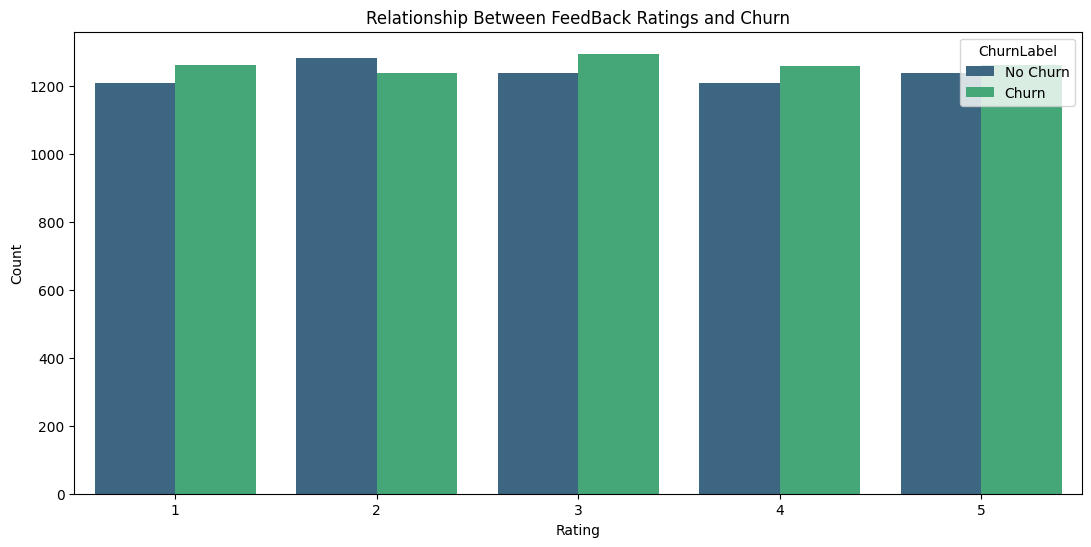

In [15]:
# Extracting rating from the Feedback column and creating a new column for it
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

# Plotting the relationship between feedback ratings and churn
plt.figure(figsize=(13, 6))
sns.countplot(x='FeedbackRating', data=df, hue='ChurnLabel', palette='viridis')
plt.title('Relationship Between FeedBack Ratings and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

From the visual, there doesn't seem to be any indication that the `FeedBack` rating affects the `ChurnLabel`.

### Data Preprocessing and Feature Engineering

Here, we will do:
- create new features that may have predictive power,
- convert categorical variables to numeric variables, using encoding techniques,
- scale or normalize numeric variables if necessary,
- split the data into training and testing subsets,
- remove irrelevant features.

We begin by converting nested values from string formats to list/dictionaries using `literal_eval` function.

In [16]:
# List nested column
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

# Apply thee literal_eval function
for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

More features will be extracted from the dataset

In [17]:
# PurchaseHistory
df['PurchasedProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

# Subscription Details
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

# Website Usage
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

# Engagement Metrics
df["EngagementMetricsLogin"] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df["EngagementMetricsFrequency"] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

# Feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])

# MarketingCommunication
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) \
        - pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)
df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) \
        - pd.to_datetime(i['Email_Sent'])).days for i in x
    ])
)

Special Extraction from three columns:
- `ServiceInteraction`,
- `PaymentHistory`,
- `ClickstreamData`.

Check for the unique values in these columns.

In [18]:
# Get all unique ServiceInteraction 'Types'
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_type = []
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type = list(set(unique_service_interaction_type))
print('All unique Service Interaction Types:', unique_service_interaction_type)

# Get all unique PaymentHistory 'Method' 
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique Payment History Methods:', unique_payment_history_methods)

# Get all Unique ClickstreamData 'Action' 
clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print('All unique Clickstream Data Actions:', unique_clickstream_data_actions)

All unique Service Interaction Types: ['Call', 'Email', 'Chat']
All unique Payment History Methods: ['Credit Card', 'PayPal', 'Bank Transfer']
All unique Clickstream Data Actions: ['Add to Cart', 'Click', 'Search']


From these three columns, we're going be encoding more.

In [19]:
# ServiceInteractions
for usit in unique_service_interaction_type:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == usit]))

# PaymentHistory
df['PaymentHistoryNoOfLatePayment'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
df['PaymentHistoryAvgNoOfLatePayment'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

# ClickstreamData
for ucda in unique_clickstream_data_actions:
    df[f'ClickStreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))

See a Subset of the new data

In [20]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayment,PaymentHistoryAvgNoOfLatePayment,ClickStreamData_Add to Cart,ClickStreamData_Click,ClickStreamData_Search
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,1,1,2,40,13.333333,8,4,12
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,5,10,4,10,3.333333,8,9,7
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,2,3,7
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,17,18,24,79,26.333333,15,16,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,4,5,1,2,0.666667,17,9,4


See all the columns we have now.

In [21]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogin',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Email', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayment', 'PaymentHistoryAvgNoOfLatePayment',
       'ClickStreamData_Add t

Pick out some columns next.

In [55]:
df_ = df[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchaseValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogin',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketingCommunicationNoOfEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpenDiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat',
    'PaymentHistoryNoOfLatePayment',
    'ClickStreamData_Click',
    'ClickStreamData_Add to Cart',
    'ClickStreamData_Search',
    'SubscriptionDuration'
]]

df_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogin,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayment,ClickStreamData_Click,ClickStreamData_Add to Cart,ClickStreamData_Search,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,15,19,...,319.0,818.0,1,1,2,40,4,8,12,871
1,66,Female,6,0,4,2844.35,Pro,100,9,9,...,88.0,110.0,5,10,4,10,9,8,7,290
2,36,Female,3,0,14,1866.52,Essential,1,97,19,...,117.0,333.0,1,1,1,8,3,2,7,319
3,62,Female,1,1,28,1378.64,Smart,25,31,4,...,423.0,159.0,17,18,24,79,16,15,16,803
4,68,Female,3,0,39,2425.05,Basic,77,51,12,...,96.0,193.0,4,5,1,2,9,17,4,580


Let's see the names of all the columns we have now.


In [56]:
df_.columns

Index(['Age', 'Gender', 'NPS', 'ChurnLabel', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogin',
       'EngagementMetricsFrequency', 'FeedbackRating',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Email', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayment', 'ClickStreamData_Click',
       'ClickStreamData_Add to Cart', 'ClickStreamData_Search',
       'SubscriptionDuration'],
      dtype='object')

In [57]:
df_.loc[0]

Age                                         31
Gender                                    Male
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                       Express
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogin                      19
EngagementMetricsFrequency              Weekly
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayment               40
ClickStreamData_Click                        4
ClickStreamData_Add to Cart                  8
ClickStreamDa

Let's check for number of unique values.

In [58]:
print('Total dataset length: ', len(df_))

df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

Total dataset length:  12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

Encoding the string parameters

In [59]:
# Gender Encoding
gender_map = {'Male': 0, 'Female': 1}

# SubscriptionPlan Encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

# EngagementMetricsFrequency
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

# Encode
df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:, 'EngagementMetricsFrequency'] = df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)

In [60]:
df_.loc[0]

Age                                         31
Gender                                       0
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                             0
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogin                      19
EngagementMetricsFrequency                   0
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayment               40
ClickStreamData_Click                        4
ClickStreamData_Add to Cart                  8
ClickStreamDa

Plot Correlation Matrix.

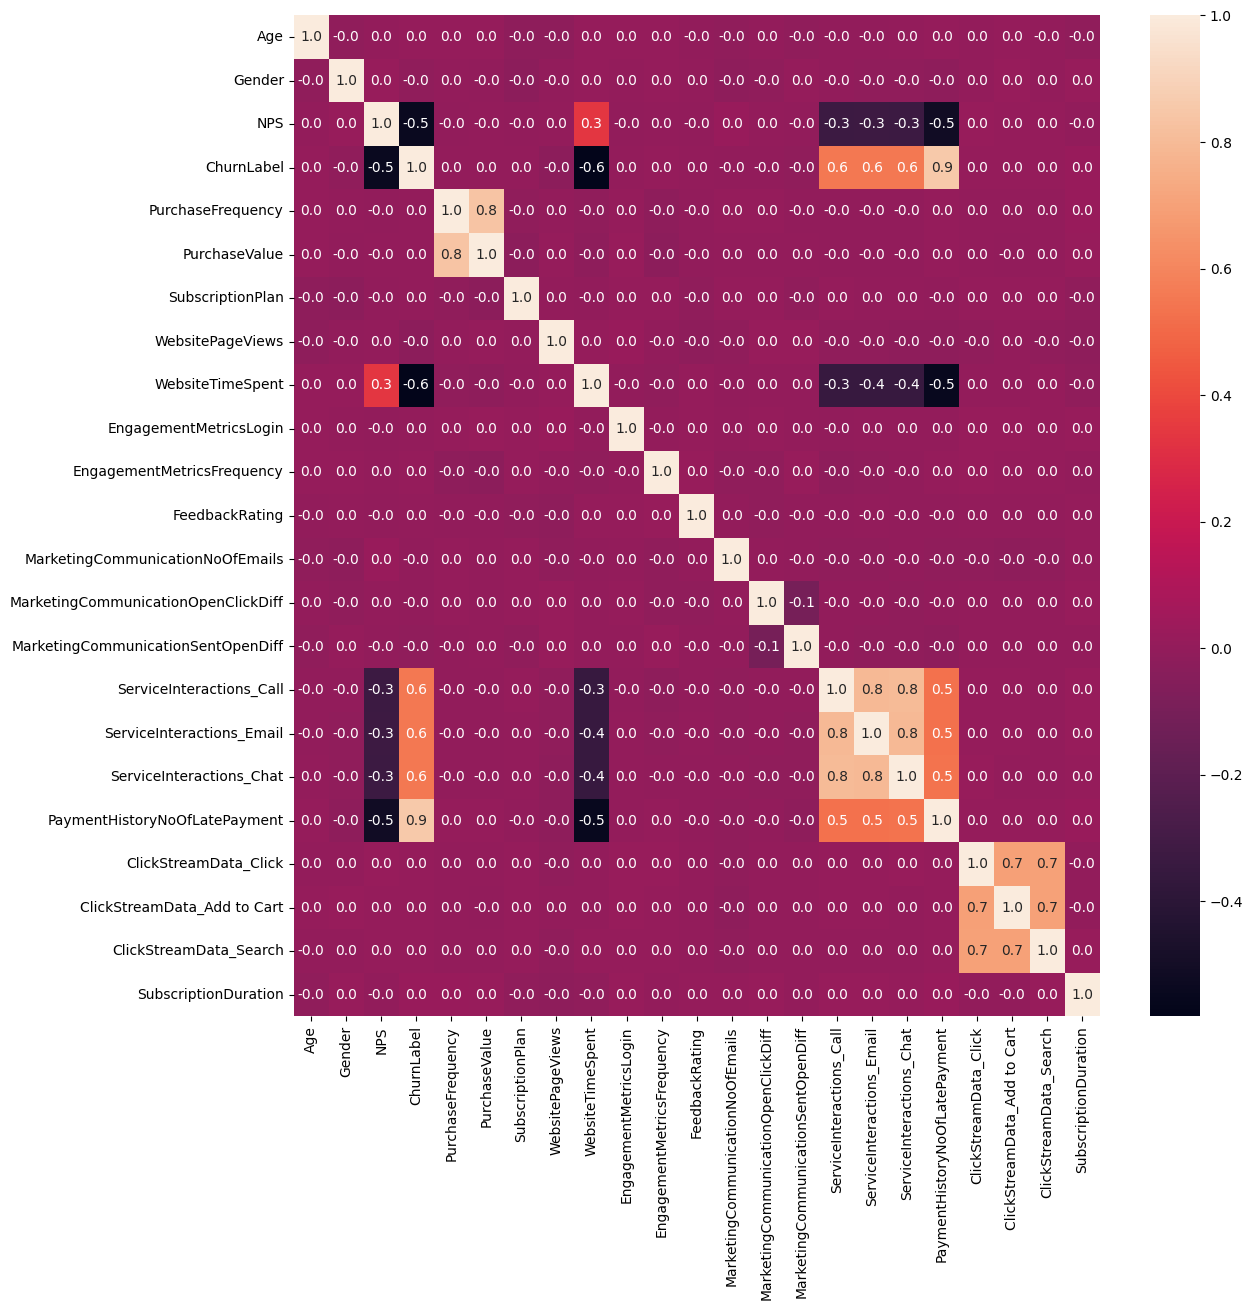

In [61]:
df_corr = df_.corr()
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(df_corr, annot=True, fmt='.1f', ax=ax)
plt.show()


Split data into train, test and validation sets

In [62]:
X = df_.drop(columns=['ChurnLabel'])
y = df_['ChurnLabel']

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=42)

In [63]:
ss= StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

### Modelling

We will be using two different models for modelling:
- `LogisticRegression`,
- `DecisionTreeClassifer`.

Metrics:
- Accurracy score,
- Precision score,
- Recall score,
- F1 score.

In [64]:
def evaluate(X, y, model, subset=''):
    y_pred = model.predict(X)

    print(f'{subset} Accuracy Score: {accuracy_score(y_pred, y)}')
    print(f'{subset} Precision Score: {precision_score(y_pred, y)}')
    print(f'{subset} Recall Score: {recall_score(y_pred, y)}')
    print(f'{subset} F1 Score: {f1_score(y_pred, y)}')

### Modelling with Logistic Regression

In [66]:
# Build the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model on the train and validation models
evaluate(X_train, y_train, lr, 'Train')
evaluate(X_val, y_val, lr, 'Validation')

Train Accuracy Score: 0.9709593430803124
Train Precision Score: 0.965938176806458
Train Recall Score: 0.9767071471232331
Train F1 Score: 0.9712928133042962
Validation Accuracy Score: 0.968
Validation Precision Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967


### Modelling with Decision Trees

In [67]:
# Build the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Evaluate the model on the train and validation models
evaluate(X_train, y_train, dt, 'Train')
evaluate(X_val, y_val, dt, 'Validation')

Train Accuracy Score: 1.0
Train Precision Score: 1.0
Train Recall Score: 1.0
Train F1 Score: 1.0
Validation Accuracy Score: 0.9426666666666667
Validation Precision Score: 0.9476584022038568
Validation Recall Score: 0.9347826086956522
Validation F1 Score: 0.9411764705882353


limiting the DecisionTree depth

In [69]:
# Build the model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

# Evaluate the model on the train and validation models
evaluate(X_train, y_train, dt, 'Train')
evaluate(X_val, y_val, dt, 'Validation')

Train Accuracy Score: 0.9768676146605247
Train Precision Score: 0.9769639692852924
Train Recall Score: 0.9775413711583925
Train F1 Score: 0.9772525849335303
Validation Accuracy Score: 0.9666666666666667
Validation Precision Score: 0.9696969696969697
Validation Recall Score: 0.9617486338797814
Validation F1 Score: 0.9657064471879286


### Evaluation on the Test Set


In [70]:
evaluate(X_test, y_test, lr, 'Train')
evaluate(X_test, y_test, dt, 'Train')

Train Accuracy Score: 0.9690898683457355
Train Precision Score: 0.9644495412844036
Train Recall Score: 0.9733796296296297
Train F1 Score: 0.9688940092165899
Train Accuracy Score: 0.9730967372638809
Train Precision Score: 0.9724770642201835
Train Recall Score: 0.9735935706084959
Train F1 Score: 0.9730349971313826


Plot the confusion matrix next.


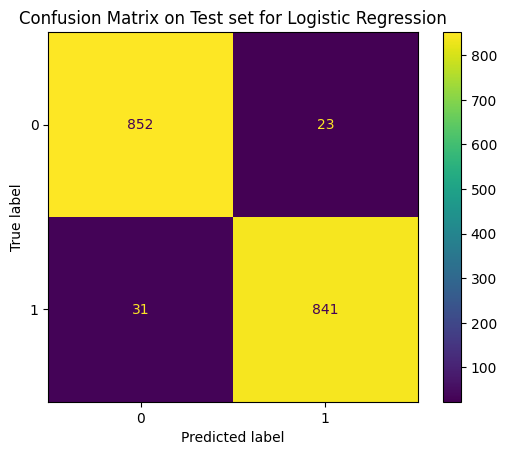

In [71]:
lr_y_pred = lr.predict(X_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test set for Logistic Regression')
plt.show()


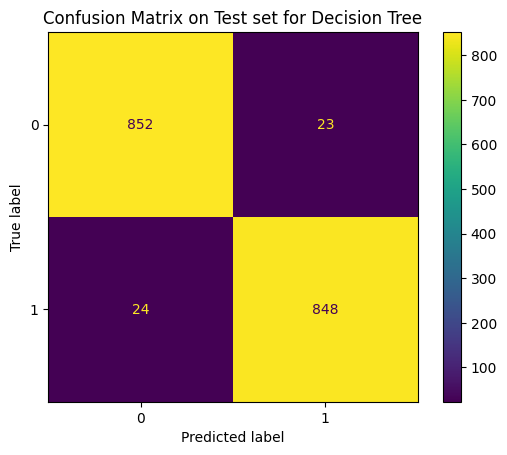

In [72]:
dt_y_pred = dt.predict(X_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test set for Decision Tree')
plt.show()


### Conclusion

The most important features:
- the number of Service Interactions the customer has had through call, email and chat,
- the number of times the customer has made Late Payments,
- the time spent on the company website,
- the Net Promoter Score(NPS).